1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR``` a ```MONTH```
5. Vypište za pomoci funkce print() datové typy jednotlivých sloupců.

In [23]:
# Buňka pro body 1-5
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

df.dtypes


STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
YEAR                int32
MONTH               int32
dtype: object

6. Spočítejte korelační koeficient mezi sloupce ```TMAX``` v ```NAME``` RUZYNE a ```TMAX``` v ```NAME``` MOSNOV.
7. Do proměnné ```kumulativni_srazky_ruzyne_2020``` spočítejte kumulativní sumu ```PRPC``` v ```NAME``` RUZYNE za rok 2020.
8. Vizualizujte data z proměnné ```kumulativni_srazky_ruzyne_2020``` pomocí spojnicového grafu.


TMAX    0.961232
dtype: float64


<Axes: xlabel='DATE'>

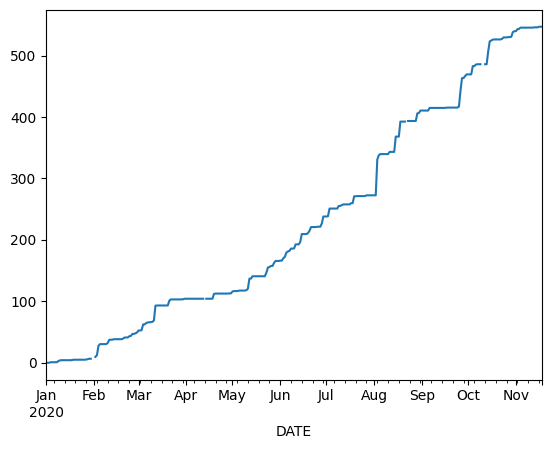

In [24]:
# Buňka pro body 6-8
df = df.set_index('DATE')
df_ruzyne = pd.DataFrame(df.loc[df['NAME']=='RUZYNE']['TMAX'])
df_mosnov = pd.DataFrame(df.loc[df['NAME']=='MOSNOV']['TMAX'])

kor_koeficient = df_ruzyne.corrwith(df_mosnov)
print(kor_koeficient)

kumulativni_srazky_2020 = df.loc[(df['YEAR']==2020) &(df['NAME']=='RUZYNE')]['PRCP'].cumsum()
kumulativni_srazky_2020.plot()
